In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/18/09/8569904c8ce5679cc02826d98de633c07abcd2443a23181e5f71ff9dacbc/folium-0.15.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/17/ce/14166d0e273d12065516625fb02426350298e7b4ba59198b5fe454b46202/branca-0.7.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 6.0 MB/s eta 0:00:00


In [5]:
data = pd.read_csv("~/Downloads/nyc_cleaned.csv")

In [6]:
data.head()

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
1,2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
2,10,5578513,4.605170,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,...,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0
3,19,18224863,4.595120,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",8,1.0,Real Bed,strict,...,40.643773,-73.950855,3 Bedroom Apartment for Small Group or Family,Flatbush,5,72.0,https://a0.muscache.com/im/pictures/e9baba99-e...,11226.0,3.0,3.0
4,21,16679342,3.688879,House,Private room,"{Internet,""Air conditioning"",Kitchen,""Smoking ...",2,1.5,Real Bed,strict,...,40.656278,-73.922645,THE LIBRARY LOUNGE,East Flatbush,57,89.0,https://a0.muscache.com/im/pictures/58fcc67e-4...,11212.0,1.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17825 entries, 0 to 17824
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              17825 non-null  int64  
 1   id                      17825 non-null  int64  
 2   log_price               17825 non-null  float64
 3   property_type           17825 non-null  object 
 4   room_type               17825 non-null  object 
 5   amenities               17825 non-null  object 
 6   accommodates            17825 non-null  int64  
 7   bathrooms               17825 non-null  float64
 8   bed_type                17825 non-null  object 
 9   cancellation_policy     17825 non-null  object 
 10  cleaning_fee            17825 non-null  bool   
 11  city                    17825 non-null  object 
 12  description             17825 non-null  object 
 13  first_review            17825 non-null  object 
 14  host_has_profile_pic    17825 non-null

In [8]:
data.isnull().sum()

Unnamed: 0                0
id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [32]:
data.describe()

,Unnamed: 0,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,17825.000000,1.782500e+04,17825.000000,17825.000000,17825.000000,17825.000000,17825.000000,17825.000000,17825.000000,17825.000000,17825.000000
mean,37169.918541,1.128427e+07,4.719821,3.035456,1.136802,40.729974,-73.952385,28.787714,93.760505,1.197812,1.667489
std,21494.460278,6.077422e+06,0.648532,1.993644,0.409757,0.054625,0.044841,38.881443,7.285636,0.758055,1.168631
min,1.000000,3.152000e+03,0.000000,1.000000,0.000000,40.508684,-74.239859,1.000000,20.000000,0.000000,1.000000
25%,18368.000000,6.291522e+06,4.248495,2.000000,1.000000,40.689989,-73.983194,4.000000,91.000000,1.000000,1.000000
50%,37153.000000,1.228751e+07,4.653960,2.000000,1.000000,40.723626,-73.955140,14.000000,95.000000,1.000000,1.000000
75%,55880.000000,1.640508e+07,5.164786,4.000000,1.000000,40.764160,-73.936840,37.000000,99.000000,1.000000,2.000000
max,74108.000000,2.122836e+07,7.600402,16.000000,6.000000,40.903895,-73.717374,465.000000,100.000000,10.000000,18.000000


In [8]:
for col in data.columns:
    print("{}:{}".format(col,data[col].nunique()))

id:74111
log_price:767
property_type:35
room_type:3
amenities:67122
accommodates:16
bathrooms:17
bed_type:5
cancellation_policy:5
cleaning_fee:2
city:6
description:73479
first_review:2554
host_has_profile_pic:2
host_identity_verified:2
host_response_rate:80
host_since:3087
instant_bookable:2
last_review:1371
latitude:74111
longitude:74111
name:73359
neighbourhood:619
number_of_reviews:371
review_scores_rating:54
thumbnail_url:65883
zipcode:769
bedrooms:11
beds:18


In [10]:
values={'last_review':0,'reviews_per_month':0}
data=data.fillna(value=values)

data.dropna(axis=0,how='any')

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
1,2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
2,10,5578513,4.605170,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,...,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0
3,19,18224863,4.595120,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",8,1.0,Real Bed,strict,...,40.643773,-73.950855,3 Bedroom Apartment for Small Group or Family,Flatbush,5,72.0,https://a0.muscache.com/im/pictures/e9baba99-e...,11226.0,3.0,3.0
4,21,16679342,3.688879,House,Private room,"{Internet,""Air conditioning"",Kitchen,""Smoking ...",2,1.5,Real Bed,strict,...,40.656278,-73.922645,THE LIBRARY LOUNGE,East Flatbush,57,89.0,https://a0.muscache.com/im/pictures/58fcc67e-4...,11212.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17820,74090,9704912,4.317488,House,Private room,"{TV,Internet,""Smoke detector"",""Wireless Intern...",2,1.0,Real Bed,flexible,...,40.675181,-73.780458,1 Bedroom (Queen) Mins From JFK and Casino,Jamaica,16,100.0,https://a0.muscache.com/im/pictures/1a2878c7-7...,11434,1.0,1.0
17821,74091,3779249,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,...,40.726571,-73.987138,East Village studio,East Village,5,100.0,https://a0.muscache.com/im/pictures/5d56c2fa-8...,10009.0,0.0,1.0
17822,74094,38663,3.688879,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,strict,...,40.797402,-73.935399,Private Room with Queen-size Bed,East Harlem,7,86.0,https://a0.muscache.com/im/pictures/71c89bee-4...,10035.0,1.0,1.0
17823,74097,15952947,4.700480,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,...,40.740904,-74.002948,Room in Beautiful Downtown Duplex,Chelsea,31,92.0,https://a0.muscache.com/im/pictures/77562b35-c...,10011.0,1.0,1.0


In [11]:
data.columns

Index(['Unnamed: 0', 'id', 'log_price', 'property_type', 'room_type',
       'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [12]:
#Categorial data and numerical data.
cat_columns=['id', 'property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy', 'city', 'description', 
             'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 
             'instant_bookable', 'last_review', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode']
num_col=['log_price', 'accommodates', 'bathrooms', 'cleaning_fee','latitude', 'longitude', 'number_of_reviews', 'review_scores_rating',
         'bedrooms', 'beds']

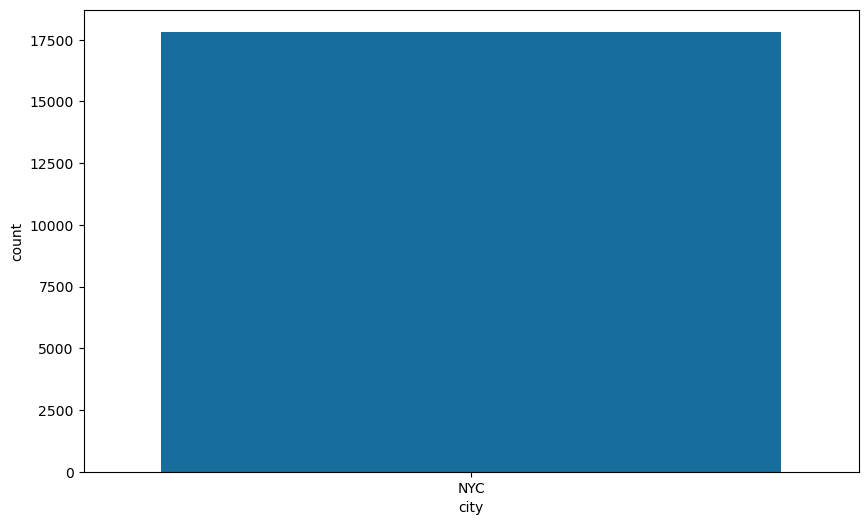

In [13]:
# Data Visualisation based on city type (to check what city data we have more)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='city', palette='colorblind')  # Using 'x' to specify the column
plt.show()

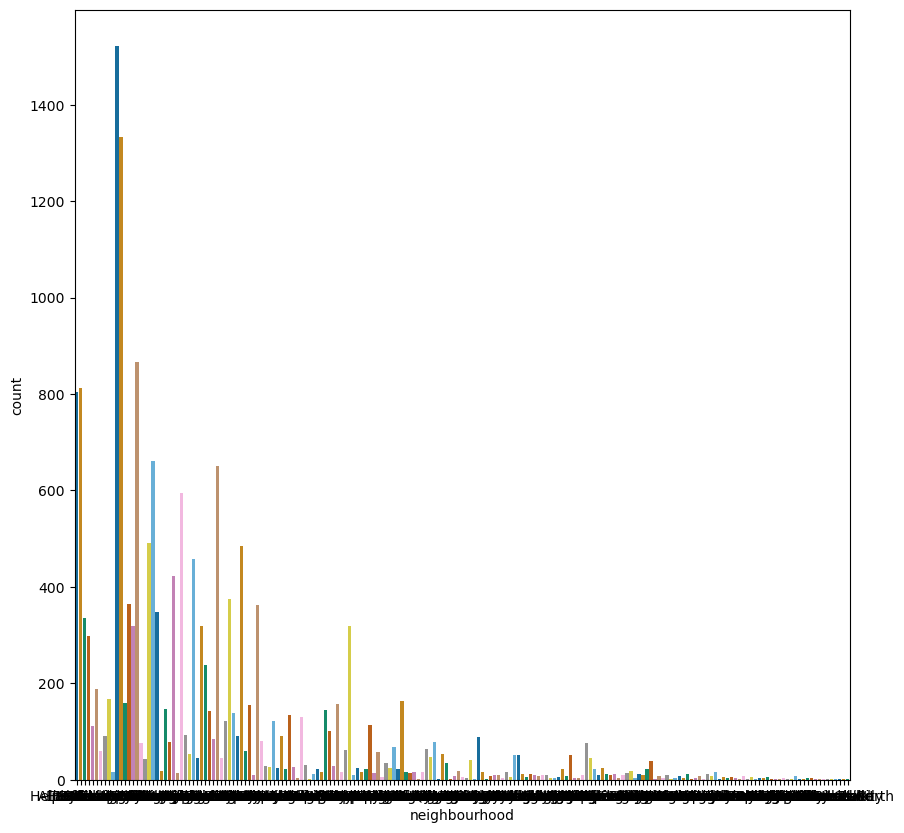

In [14]:
#Data Visualisation based on city type (to check what neighbourhood data we have more)
#Data visualisation based on negihbourhood 
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.countplot(data=data, x="neighbourhood", palette="colorblind")  # Assuming you want to count occurrences of each category in the 'neighbourhood' column
plt.show()


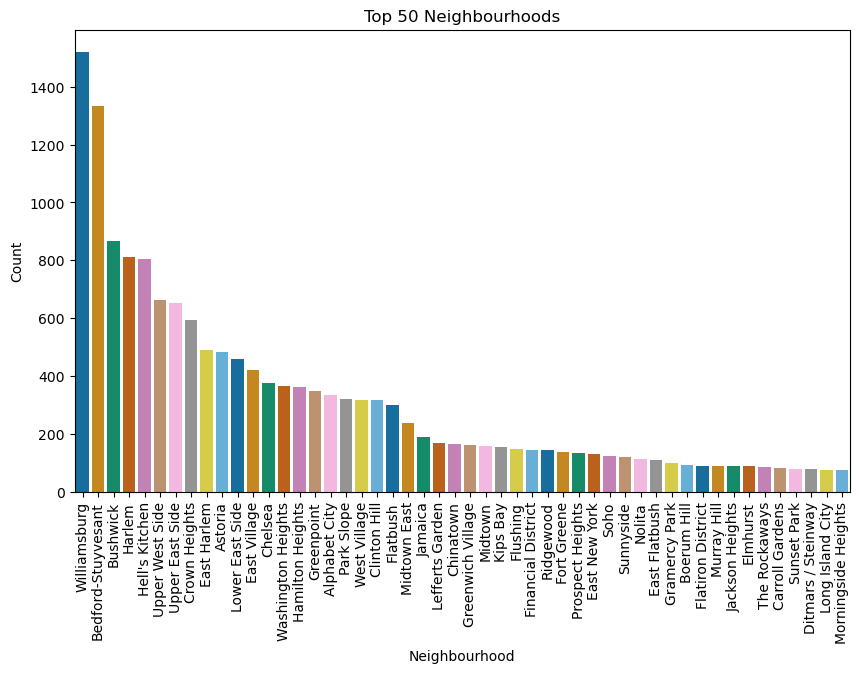

In [15]:
#neighborhood_counts = data['neighbourhood'].value_counts()
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Count occurrences of each neighborhood
neighborhood_counts = data['neighbourhood'].value_counts()

# Select the top 50 neighborhoods
top_50_neighborhoods = neighborhood_counts.head(50)

# Plot only the top 50 neighborhoods
sns.barplot(x=top_50_neighborhoods.index, y=top_50_neighborhoods.values, palette="colorblind")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.title("Top 50 Neighbourhoods")
plt.show()

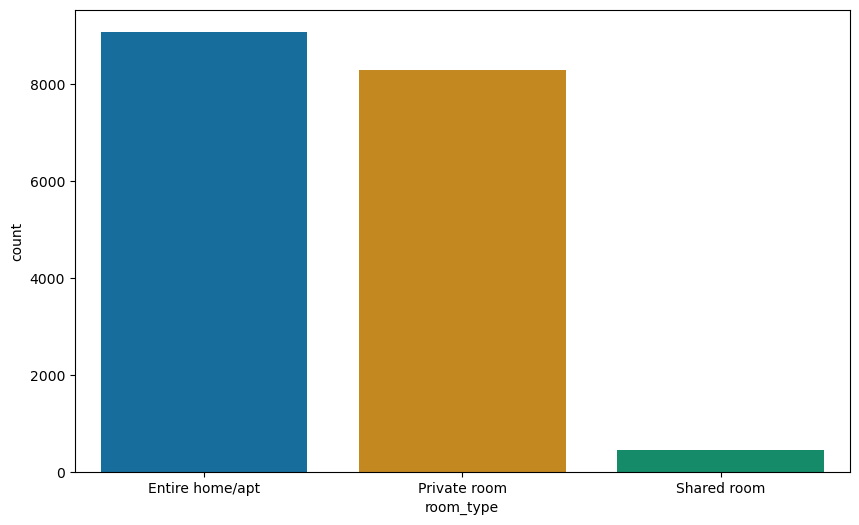

In [16]:
#Data Visualisation based on city type (to check what room_type data we have more in given data set)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='room_type', palette='colorblind')  # Using 'x' to specify the column
plt.show()

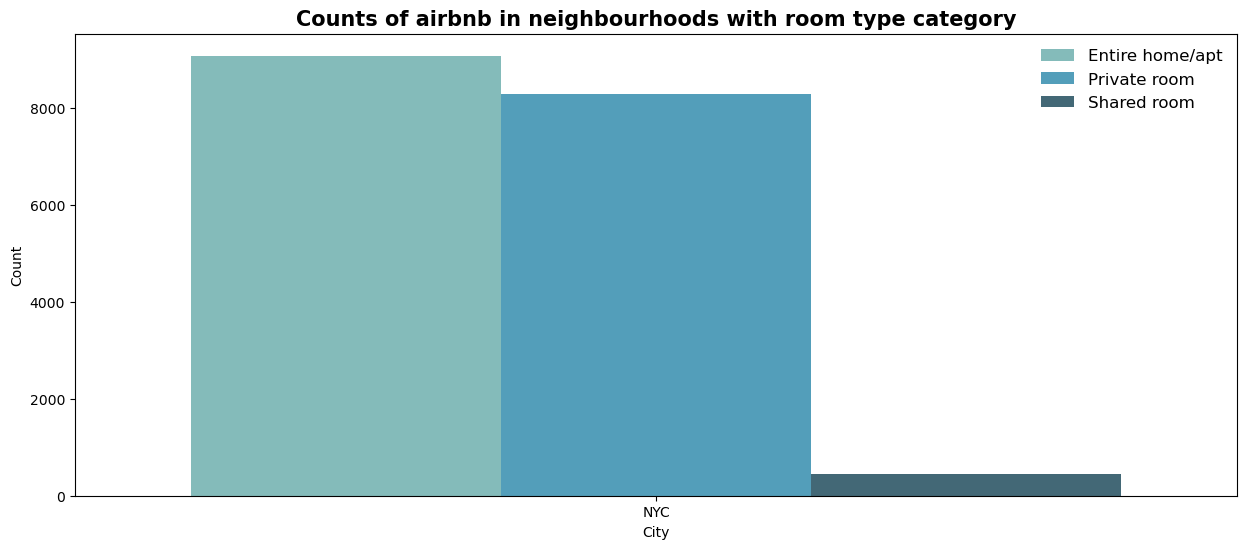

In [17]:
plt.figure(figsize=(15,6))

sns.countplot(data=data, x='city', hue='room_type', palette='GnBu_d')

plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15,fontweight='bold')
plt.xlabel('City')
plt.ylabel("Count")

plt.legend(frameon=False, fontsize=12)

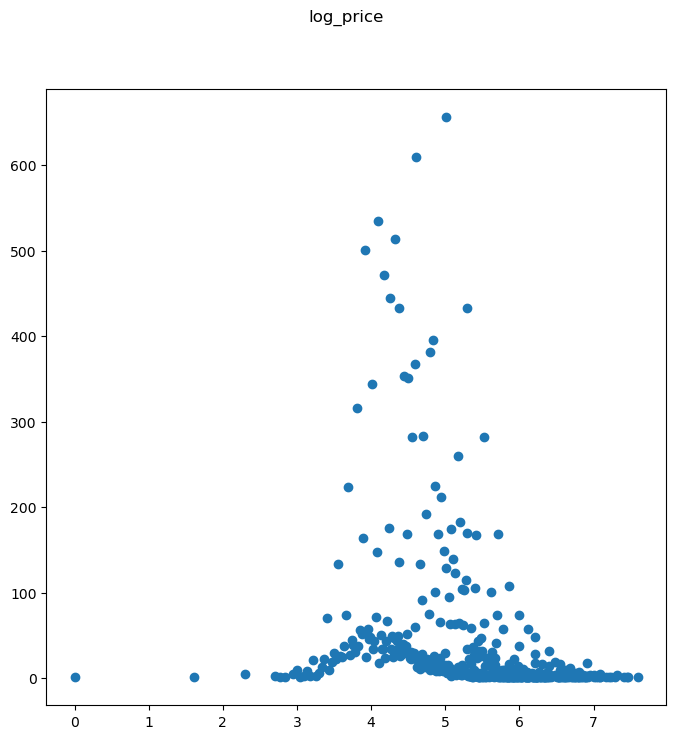

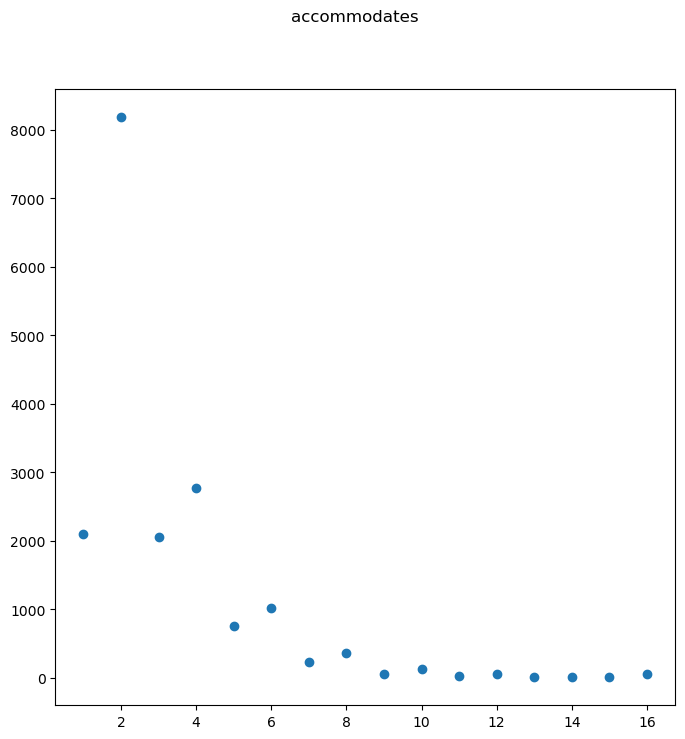

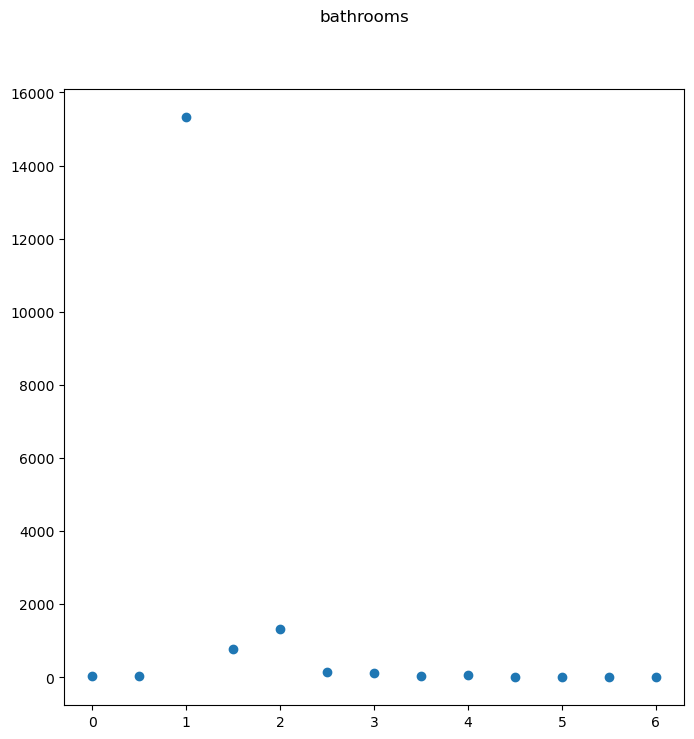

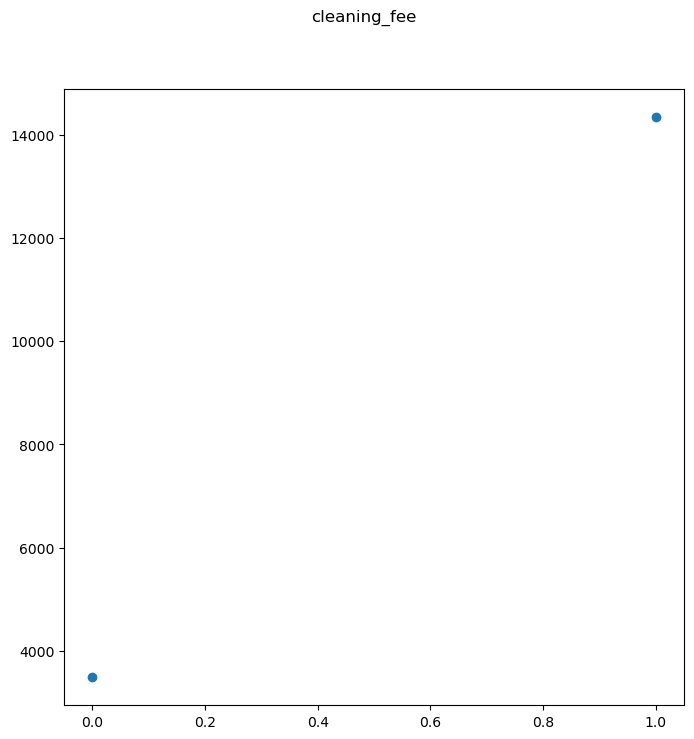

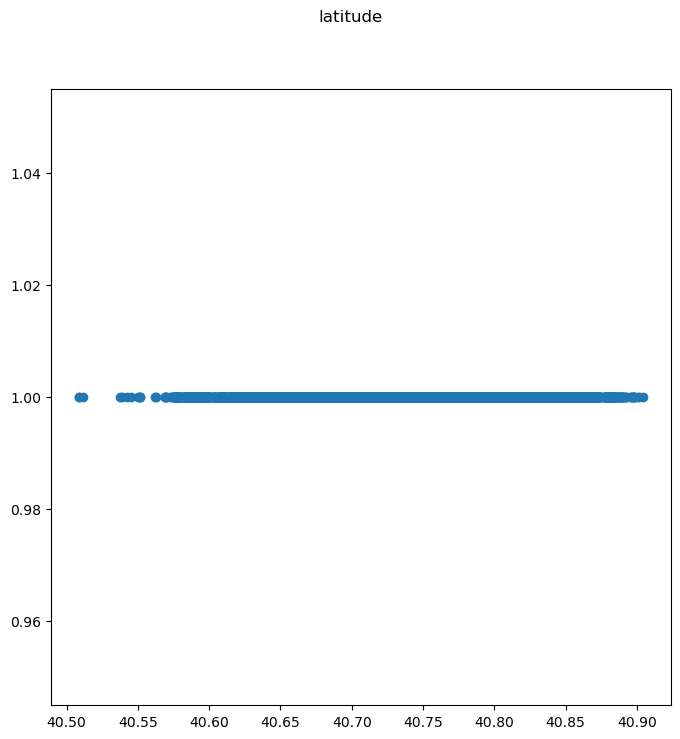

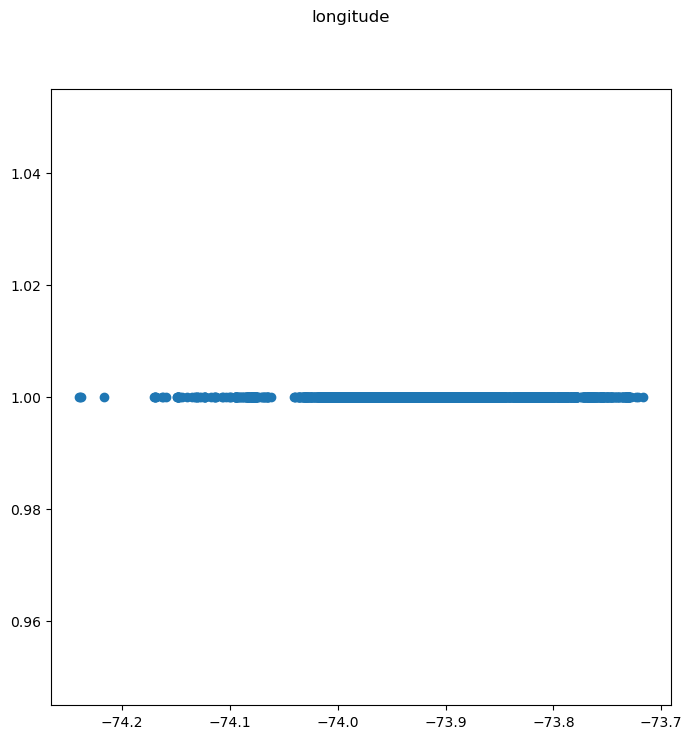

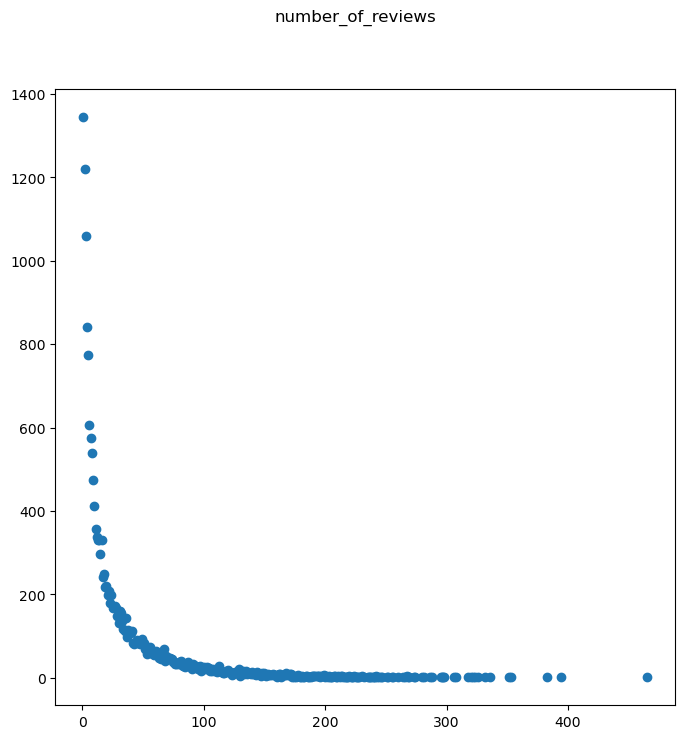

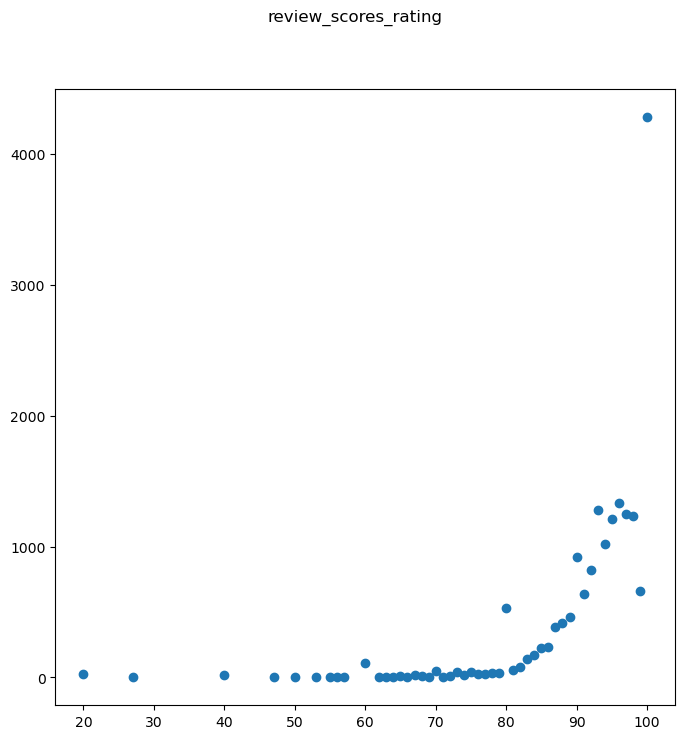

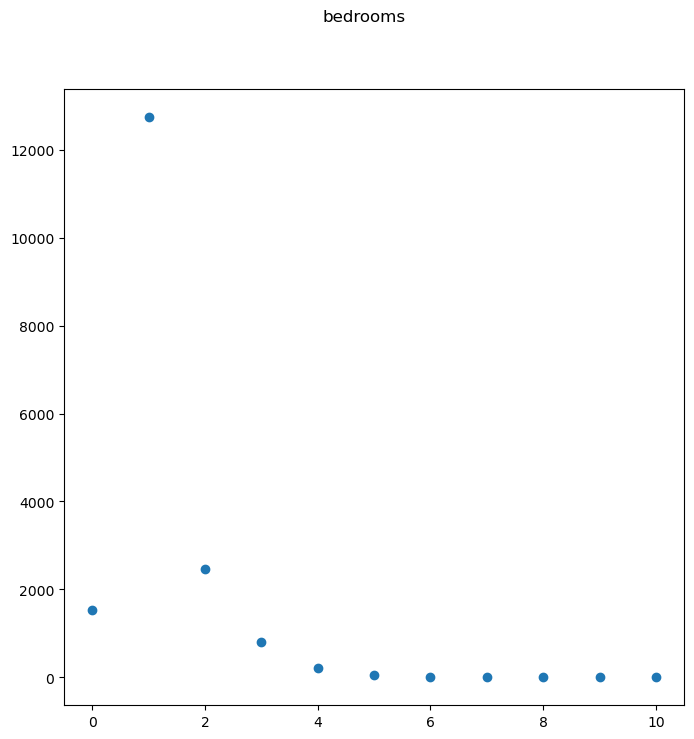

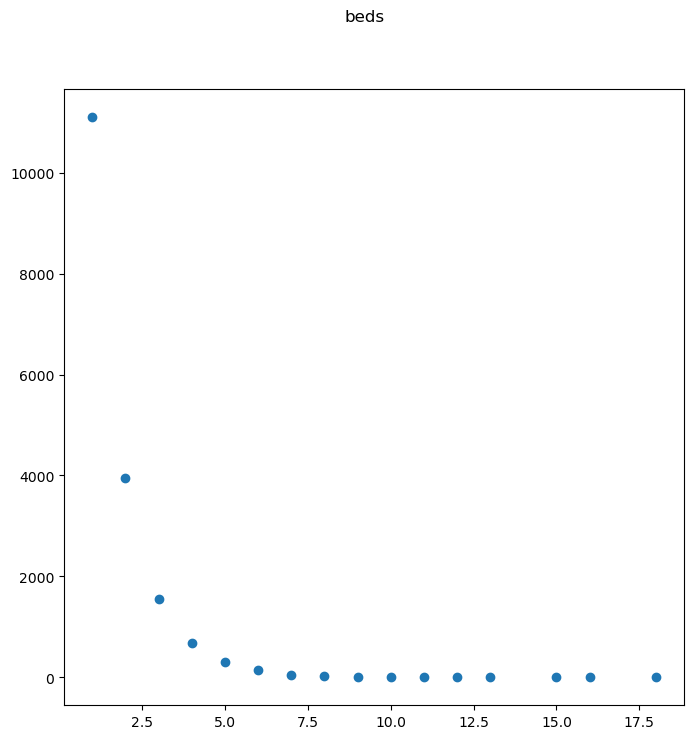

In [18]:
#TO CHECK FOR OUTLIERS (for all numeric values)
for col in num_col:
    count3=dict(data[col].value_counts())
    names=count3.keys()
    values=count3.values()
    fig,axs=plt.subplots(1, 1, figsize=(8, 8), sharey=True)
    axs.scatter(names, values)
    fig.suptitle(col)

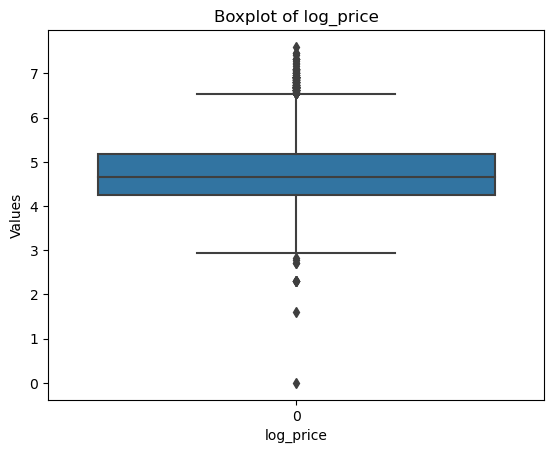

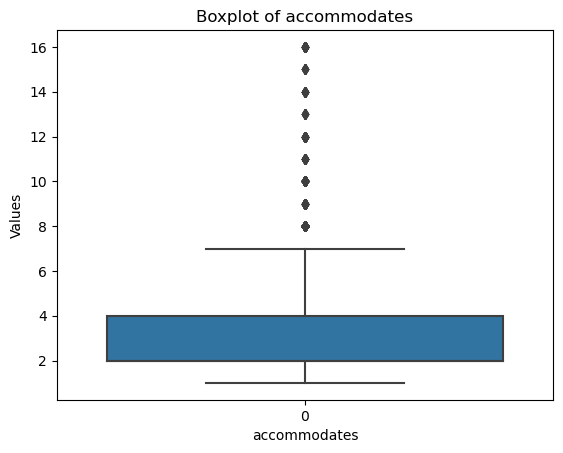

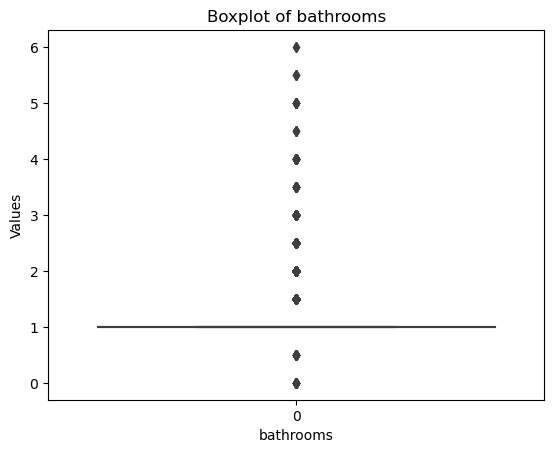

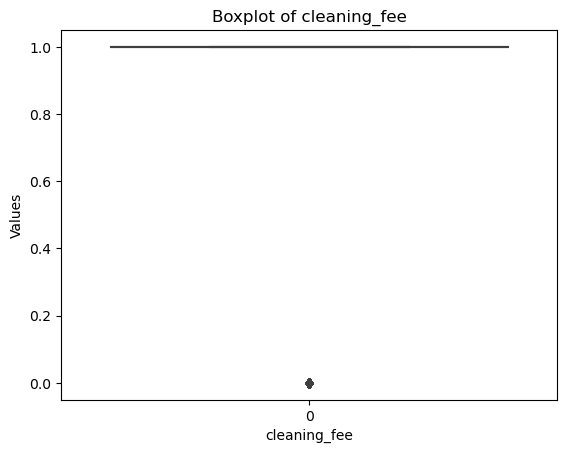

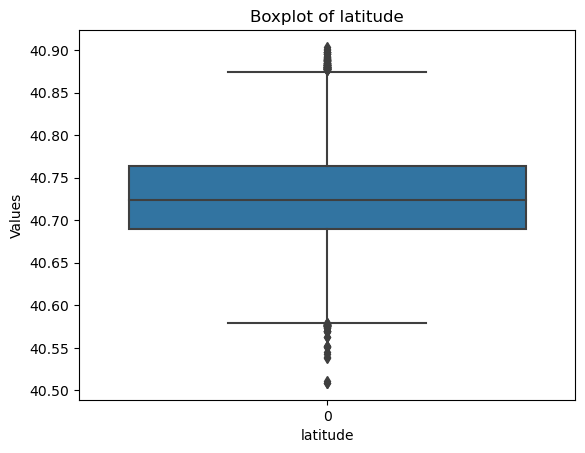

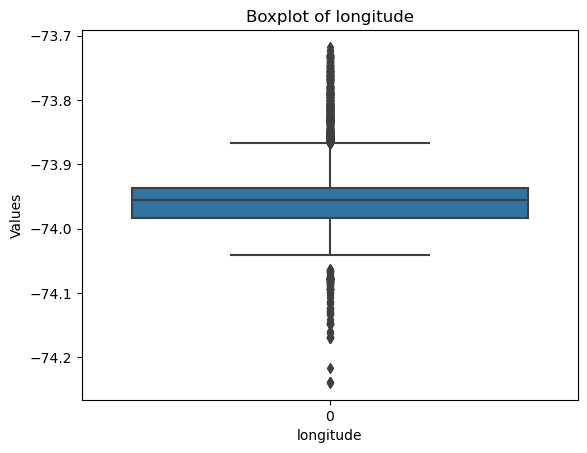

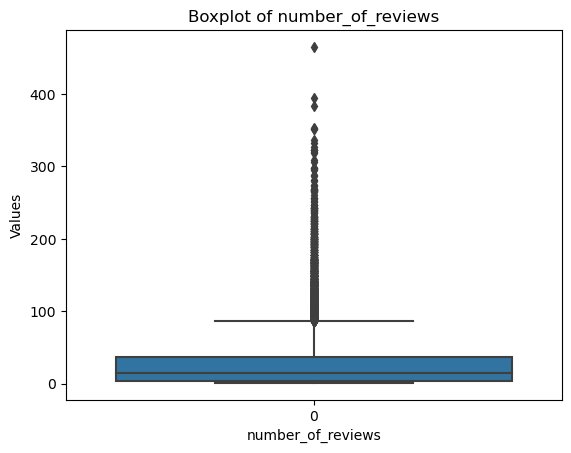

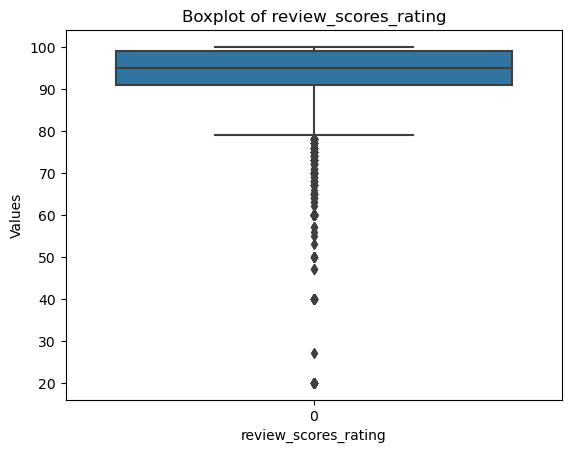

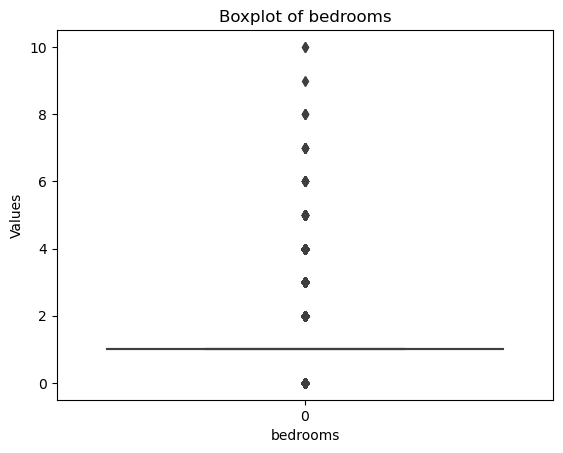

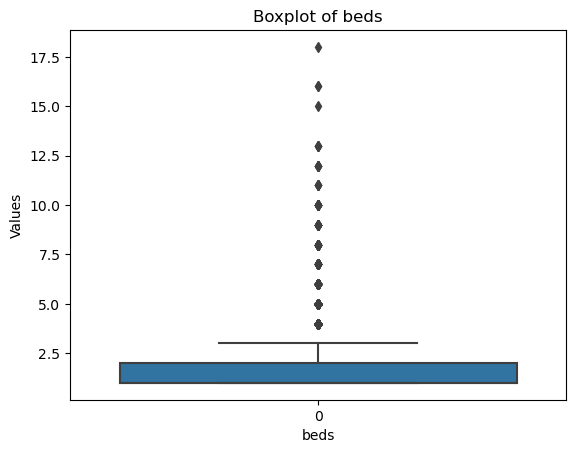

In [19]:
#Numerical_columns data with box plots : My box plot concludes that there are big outliers
for col in num_col:
    sns.boxplot(data[col])
    plt.xlabel(col)  # Label for the x-axis
    plt.ylabel("Values")  # Label for the y-axis
    plt.title(f"Boxplot of {col}")  # Title of the plot
    plt.show()

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_46179/1723512752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


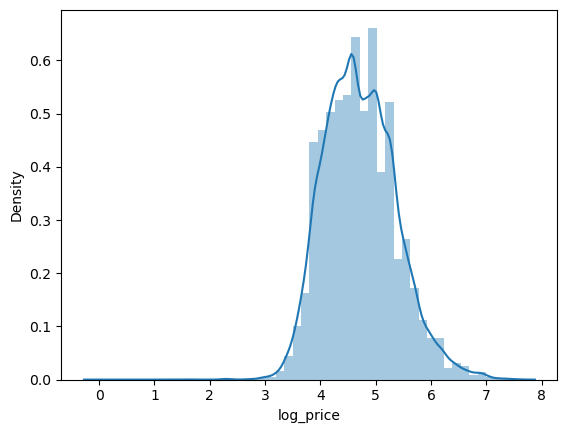

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_46179/1723512752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


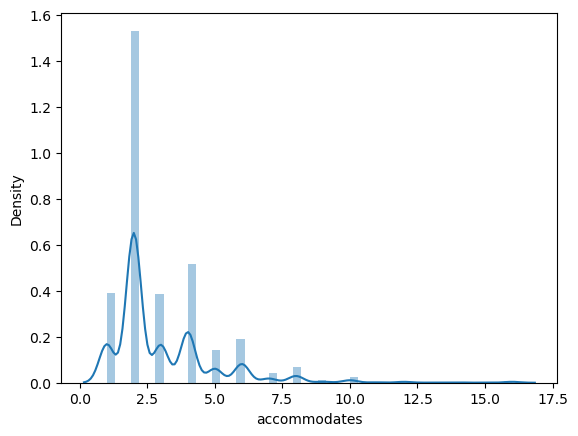

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_46179/1723512752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


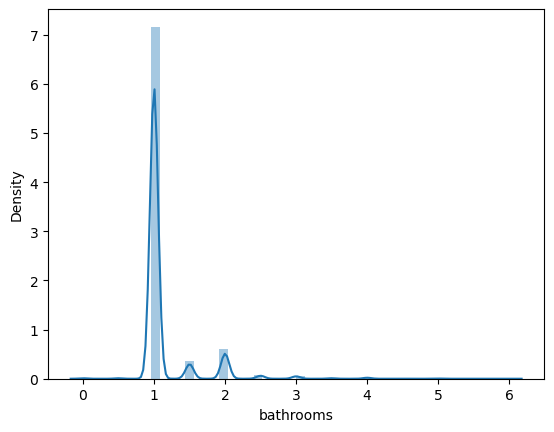

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_46179/1723512752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


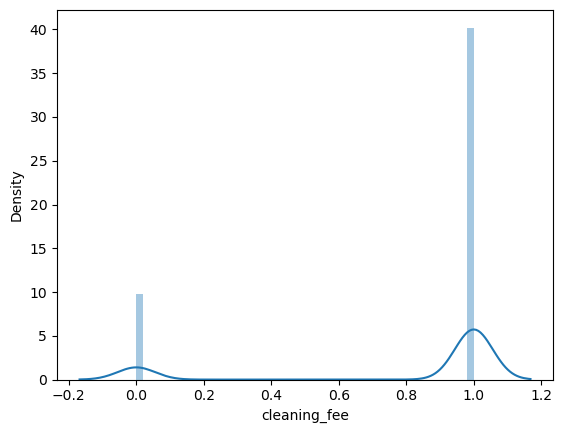

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_46179/1723512752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


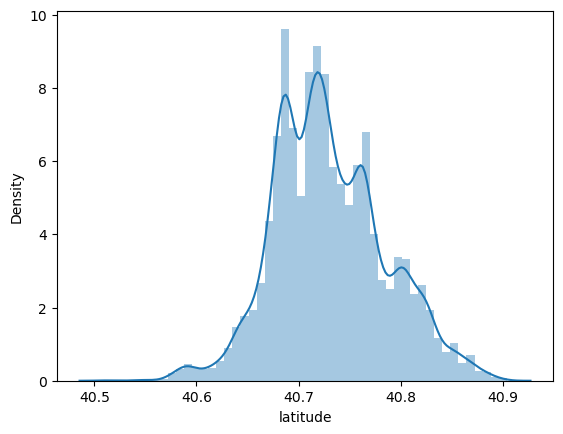

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_46179/1723512752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


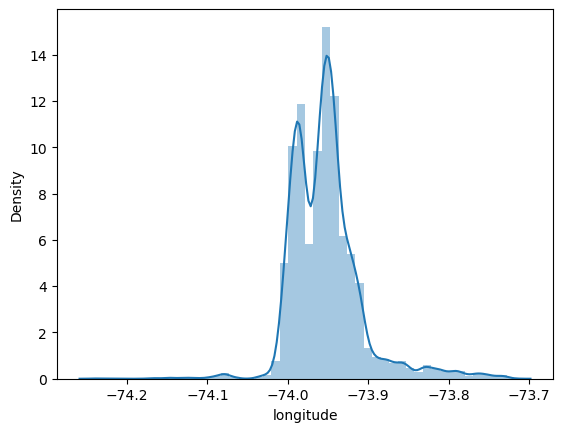

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_46179/1723512752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


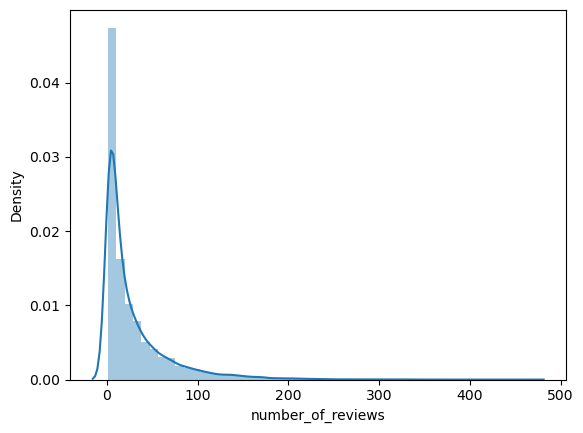

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_46179/1723512752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


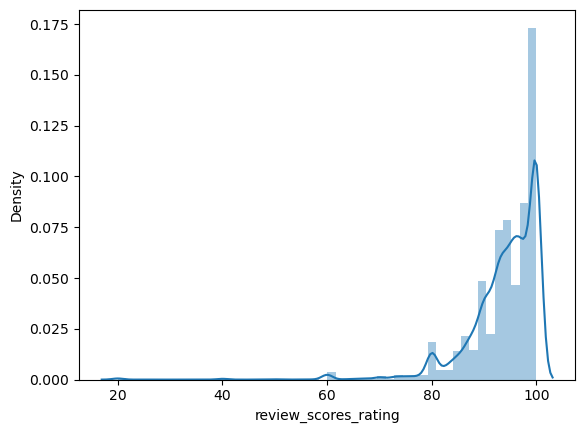

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_46179/1723512752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


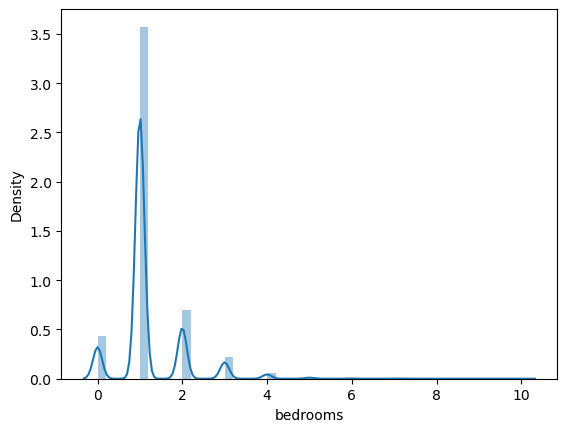

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_46179/1723512752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


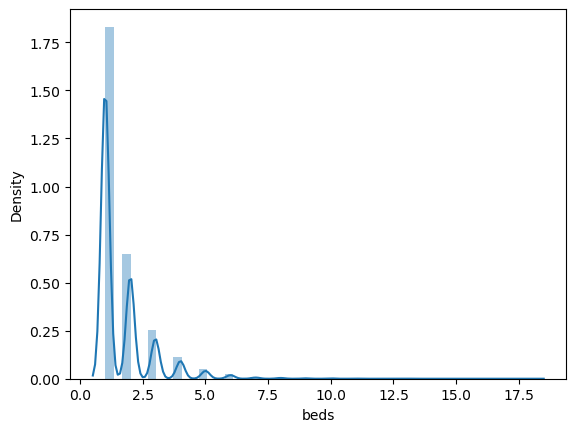

In [20]:
#Plotting distribution plot
for col in num_col:
    sns.distplot(data[col])
    plt.show()

In [21]:
#since distribution is symmetric for atleast third quartile we can find null values with mean.
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Now, calculate the correlation
correlation_matrix = data_numeric.corr()
correlation_matrix

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
Unnamed: 0,1.000000,0.004453,0.011102,NaN,NaN,NaN,0.001971,0.006227,NaN,NaN,...,-0.004145,-0.003896,NaN,NaN,-0.008084,-0.004125,NaN,0.000940,0.004593,0.000996
id,0.004453,1.000000,-0.005449,NaN,NaN,NaN,-0.000804,-0.013494,NaN,NaN,...,0.004221,0.004448,NaN,NaN,0.008319,0.003379,NaN,0.000500,-0.010102,-0.007961
log_price,0.011102,-0.005449,1.000000,NaN,NaN,NaN,0.585486,0.227998,NaN,NaN,...,0.059592,-0.363742,NaN,NaN,0.013876,0.055499,NaN,-0.325339,0.401544,0.469322
property_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.001971,-0.000804,0.585486,NaN,NaN,NaN,1.000000,0.375022,NaN,NaN,...,-0.051682,-0.038744,NaN,NaN,0.078775,-0.064361,NaN,-0.002586,0.682288,0.838928
bathrooms,0.006227,-0.013494,0.227998,NaN,NaN,NaN,0.375022,1.000000,NaN,NaN,...,-0.056489,-0.006380,NaN,NaN,-0.019493,-0.026423,NaN,0.044246,0.432070,0.393824
bed_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cancellation_policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#since at some point i have null values my result is completely NaN.
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Drop rows containing NaN values
data_numeric = data_numeric.dropna()

# Calculate the correlation matrix
correlation_matrix = data_numeric.corr()
correlation_matrix

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
log_price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bed_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cancellation_policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


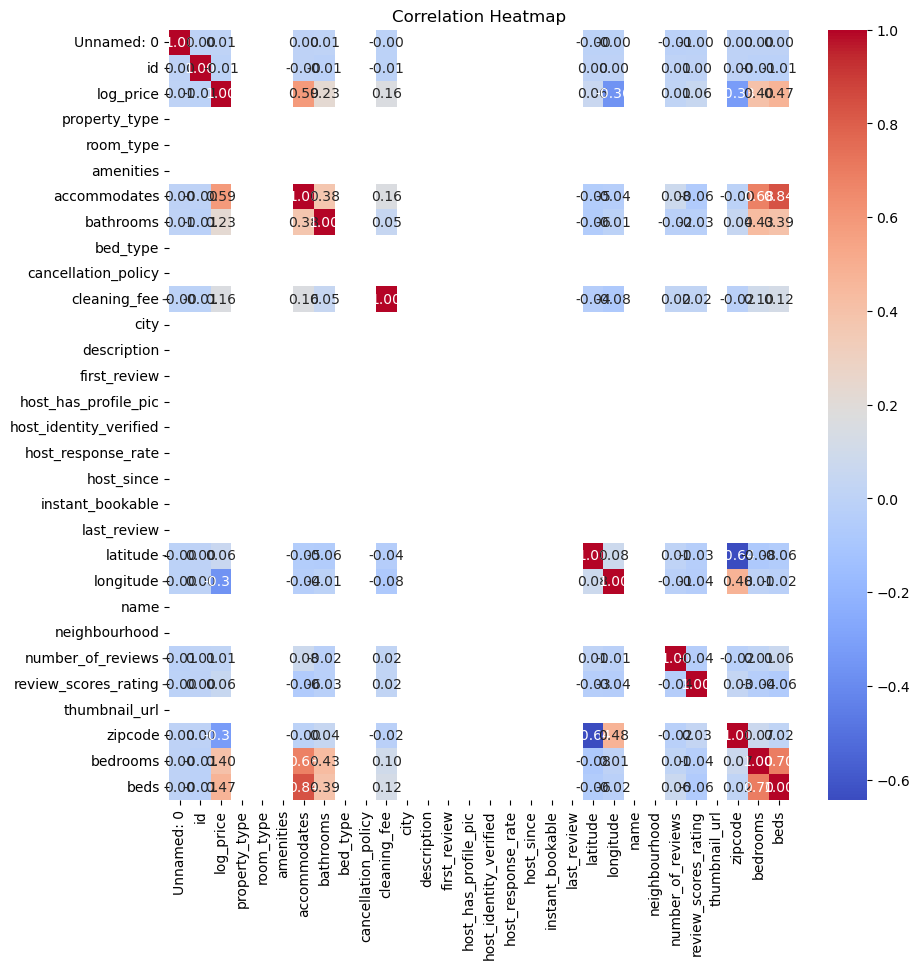

In [23]:
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

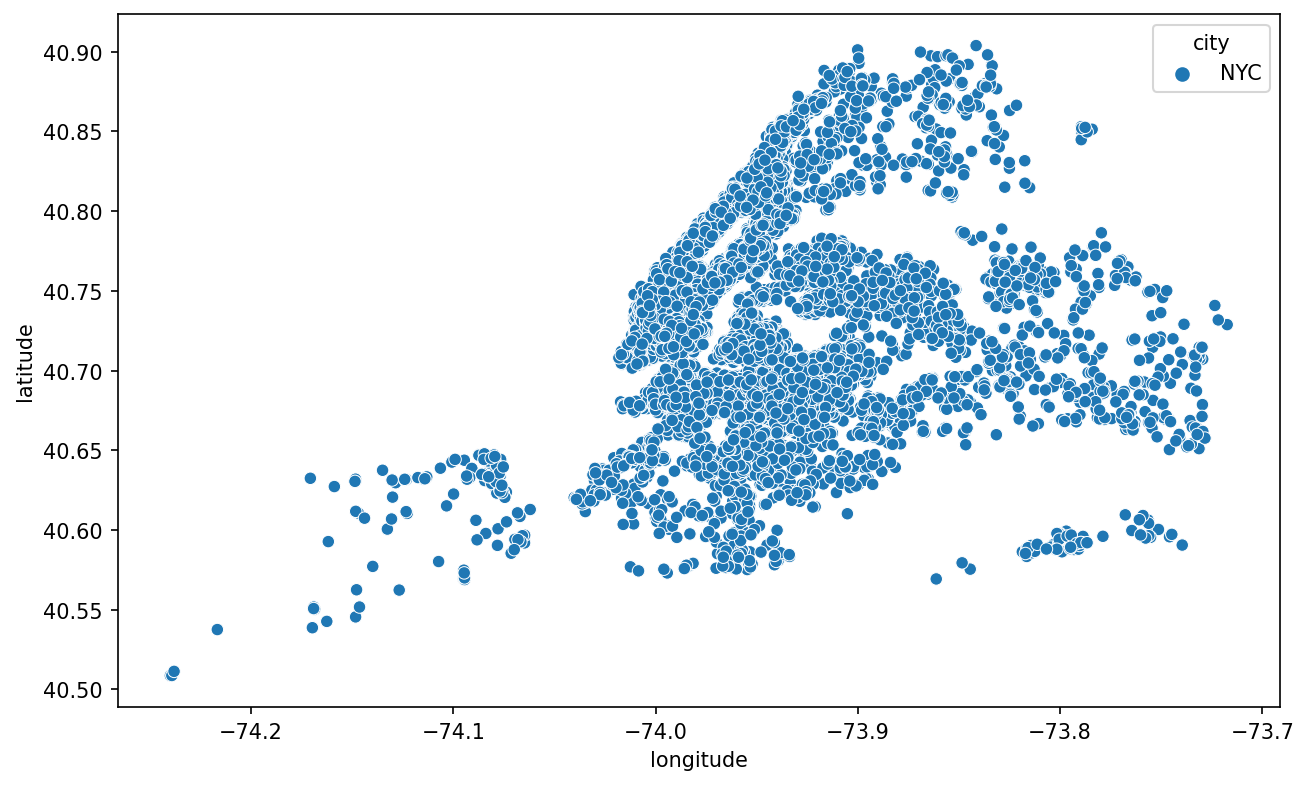

In [24]:
#Plotting location and price on NYC map
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(data=data, x='longitude', y='latitude', hue='city')
plt.ioff()
plt.show()

In [25]:
#NYC hall
m=folium.Map([40.7128,-74.0060],zoom_start=10)
HeatMap(data[['latitude','longitude']].dropna(),radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [26]:
top_reviewed_listings=data.nlargest(100,'number_of_reviews')
top_reviewed_listings

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
1575,6535,2069027,3.891820,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,...,40.821243,-73.938382,Beautiful Bedroom Manhattan,Harlem,465,89.0,https://a0.muscache.com/im/pictures/58558127/2...,10039,1.0,1.0
8606,35911,3833207,4.997212,Guest suite,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,...,40.710529,-73.960866,5-Star Roof-Top Room--Williamsburg,Williamsburg,394,96.0,https://a0.muscache.com/im/pictures/153825/933...,11211.0,1.0,1.0
1359,5622,16469132,4.905275,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,...,40.668535,-73.989116,Park Slope Green Guest House,Park Slope,383,98.0,https://a0.muscache.com/im/pictures/513490/ccd...,11215,1.0,1.0
14602,60990,8763643,4.442651,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,...,40.687305,-73.963399,Room with En Suite Bathroom & Deck,Clinton Hill,353,89.0,https://a0.muscache.com/im/pictures/619793/f15...,11238.0,1.0,1.0
1033,4286,19036818,4.094345,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,2.0,Real Bed,strict,...,40.825101,-73.942869,PRIVATE Room on Historic Sugar Hill,Hamilton Heights,351,93.0,https://a0.muscache.com/im/pictures/65745077/0...,10031,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,41689,16735755,3.218876,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",1,1.0,Real Bed,strict,...,40.673581,-73.911427,The JFK Stopover & Bookworm's Nook,Crown Heights,210,92.0,https://a0.muscache.com/im/pictures/710a635e-f...,11233.0,1.0,1.0
17555,73017,20958832,4.605170,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",3,1.0,Real Bed,strict,...,40.687665,-73.912607,It's all about Bushwick BROOKLYN,Bushwick,210,94.0,https://a0.muscache.com/im/pictures/33977646/2...,11207,1.0,2.0
2889,11970,13278282,5.220356,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,...,40.707273,-73.968986,East River Waterfront Private deck Fireplace &...,Williamsburg,209,94.0,https://a0.muscache.com/im/pictures/89463882/4...,11211.0,2.0,3.0
6105,25409,14147697,4.174387,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,...,40.710235,-73.951702,Williamsburg Penthouse Hideaway,Williamsburg,209,90.0,https://a0.muscache.com/im/pictures/59210944/5...,11211.0,1.0,1.0


In [27]:
data.columns

Index(['Unnamed: 0', 'id', 'log_price', 'property_type', 'room_type',
       'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [28]:
#One-hot Encoding (syntax just ran to check)
data_1hot=pd.get_dummies(data, columns=['city','neighbourhood',"room_type"], 
                           prefix=['city','n',"rt"],drop_first=True)
data_1hot

,Unnamed: 0,id,log_price,property_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,n_Whitestone,n_Williamsbridge,n_Williamsburg,n_Willowbrook,n_Windsor Terrace,n_Woodhaven,n_Woodlawn,n_Woodside,rt_Private room,rt_Shared room
0,1,6304928,5.129899,Apartment,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,False,False,False,False,False,False,False,False,False,False
1,2,7919400,4.976734,Apartment,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,False,False,False,False,False,False,False,False,False,False
2,10,5578513,4.605170,Apartment,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,...,False,False,False,False,False,False,False,False,True,False
3,19,18224863,4.595120,House,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",8,1.0,Real Bed,strict,True,...,False,False,False,False,False,False,False,False,False,False
4,21,16679342,3.688879,House,"{Internet,""Air conditioning"",Kitchen,""Smoking ...",2,1.5,Real Bed,strict,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17820,74090,9704912,4.317488,House,"{TV,Internet,""Smoke detector"",""Wireless Intern...",2,1.0,Real Bed,flexible,False,...,False,False,False,False,False,False,False,False,True,False
17821,74091,3779249,5.010635,Apartment,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,False,...,False,False,False,False,False,False,False,False,False,False
17822,74094,38663,3.688879,Apartment,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,strict,True,...,False,False,False,False,False,False,False,False,True,False
17823,74097,15952947,4.700480,Apartment,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,False,False,False,False,False,False,False,False,True,False


In [33]:
#Need to perform PCA n amenities but it didn't work shows error Memory allocation and doesn't sparse input
#Checked for TruncateSVD had issues in converting string to float (used one-hot encoding to resolve) but same error memory 
#allocation error
#Finally used labelEncoder got the similar code from git hub.
new_data=data_1hot
X = new_data.drop('amenities',axis=1)
y = new_data['amenities']
X,y


(       Unnamed: 0        id  log_price property_type  accommodates  bathrooms  \
 0               1   6304928   5.129899     Apartment             7        1.0   
 1               2   7919400   4.976734     Apartment             5        1.0   
 2              10   5578513   4.605170     Apartment             2        1.0   
 3              19  18224863   4.595120         House             8        1.0   
 4              21  16679342   3.688879         House             2        1.5   
 ...           ...       ...        ...           ...           ...        ...   
 17820       74090   9704912   4.317488         House             2        1.0   
 17821       74091   3779249   5.010635     Apartment             2        1.0   
 17822       74094     38663   3.688879     Apartment             2        1.0   
 17823       74097  15952947   4.700480     Apartment             2        1.0   
 17824       74108  18688039   5.220356     Apartment             5        1.0   
 
        bed_ty

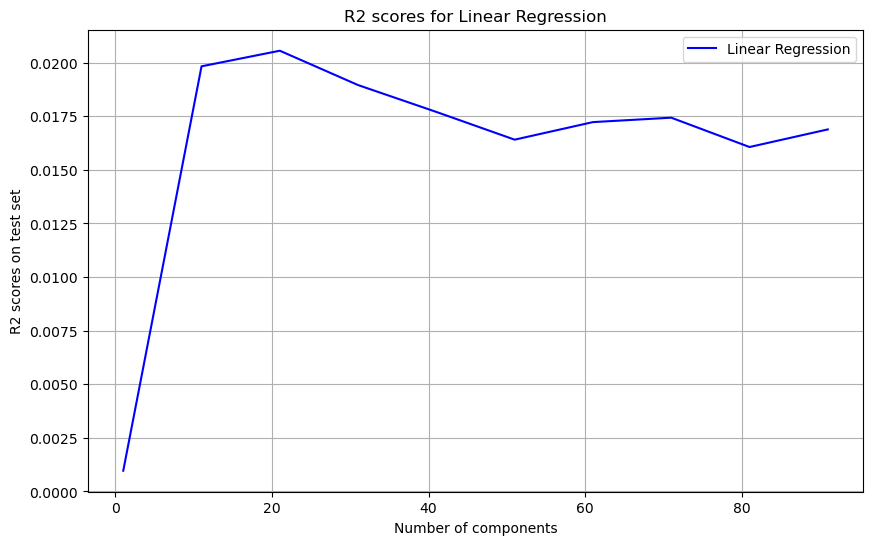

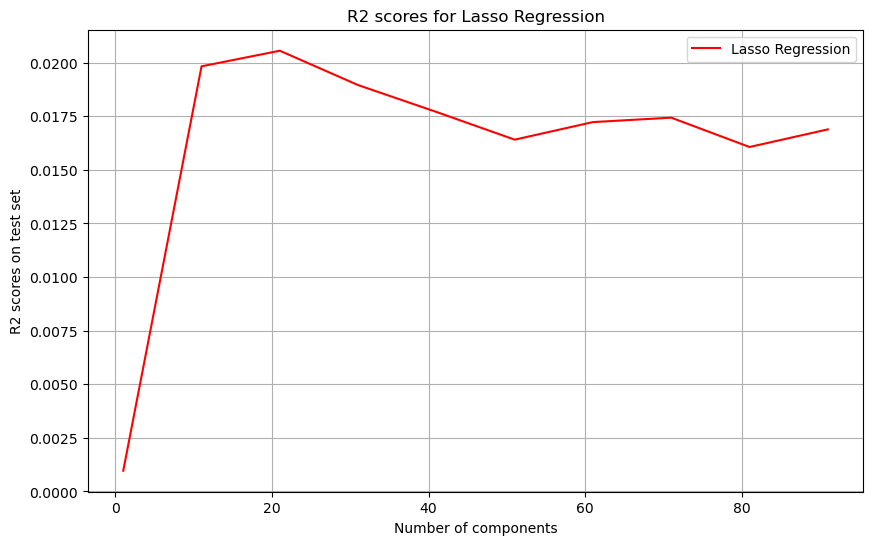

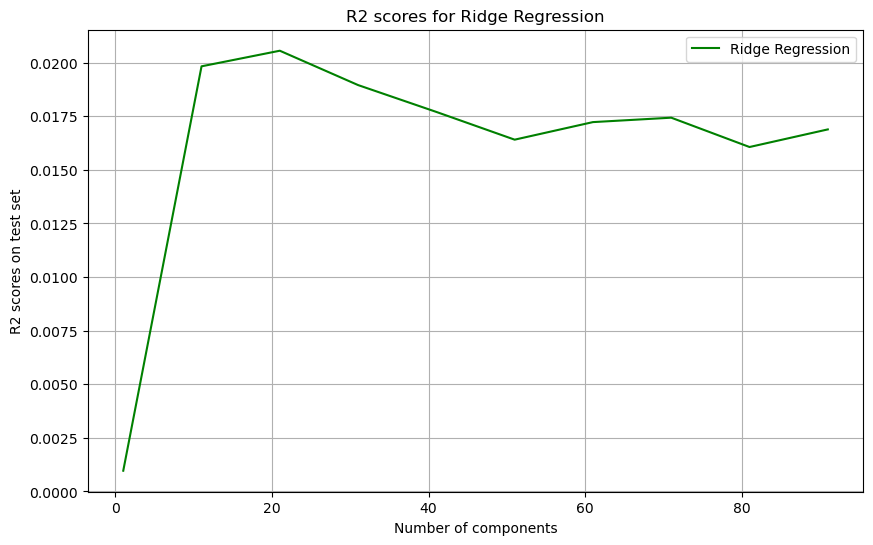

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

#################################################################
# Identify categorical columns picks cat_cols with dtype object
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Convert all categorical columns to strings
X[categorical_cols] = X[categorical_cols].astype(str)

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Apply preprocessing pipeline
X_processed = preprocessor.fit_transform(X)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_processed_imputed = imputer.fit_transform(X_processed)

# Standardize features
scaler = StandardScaler(with_mean=False)
X_processed_scaled = scaler.fit_transform(X_processed_imputed)

###########################################################

# Specify the number of components
n_components = 100  # Adjust this based on your needs
svd = TruncatedSVD(n_components=n_components, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
X_svd = svd.fit_transform(X_processed_scaled)

# Encode categorical target variable y (which has amenities as declared previously)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform regression and calculate R2 scores
scores = []
lasso_scores = []
ridge_scores = []
x = list(range(1, X_svd.shape[1], 10))

for i in x:
    X_train, X_test, y_train, y_test = train_test_split(X_svd[:, :i], y_encoded, test_size=0.3, random_state=42)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    scores.append(r2_score(y_test, y_pred_lr))

    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    lasso_scores.append(r2_score(y_test, y_pred_lasso))

    ridge = LinearRegression()  
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_scores.append(r2_score(y_test, y_pred_ridge))

# Plotting
# Plotting for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(x, scores, label="Linear Regression", color='blue')
plt.title("R2 scores for Linear Regression")
plt.xlabel("Number of components")
plt.ylabel("R2 scores on test set")
plt.legend()
plt.grid(True)
plt.show()

# Plotting for Lasso Regression
plt.figure(figsize=(10, 6))
plt.plot(x, lasso_scores, label="Lasso Regression", color='red')
plt.title("R2 scores for Lasso Regression")
plt.xlabel("Number of components")
plt.ylabel("R2 scores on test set")
plt.legend()
plt.grid(True)
plt.show()

# Plotting for Ridge Regression
plt.figure(figsize=(10, 6))
plt.plot(x, ridge_scores, label="Ridge Regression", color='green')
plt.title("R2 scores for Ridge Regression")
plt.xlabel("Number of components")
plt.ylabel("R2 scores on test set")
plt.legend()
plt.grid(True)
plt.show()



In [35]:
from sklearn.metrics import mean_squared_error
# Predict using the trained models
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

# Calculate R^2 scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Calculate RMSE values
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("R2 score for Linear Regression:", r2_lr)
print("RMSE for Linear Regression:", rmse_lr)
print()
print("R2 score for Lasso Regression:", r2_lasso)
print("RMSE for Lasso Regression:", rmse_lasso)
print()
print("R2 score for Ridge Regression:", r2_ridge)
print("RMSE for Ridge Regression:", rmse_ridge)


R2 score for Linear Regression: 0.016885887882426287
RMSE for Linear Regression: 4859.57004503219

R2 score for Lasso Regression: 0.01688703787880974
RMSE for Lasso Regression: 4859.5672027936635

R2 score for Ridge Regression: 0.016885887882426287
RMSE for Ridge Regression: 4859.57004503219


In [36]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
num_folds = 5

# Initialize KFold cross-validator
cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.01),
    "Ridge Regression": Ridge(alpha=1.0)
}

# Perform cross-validation for each model
for name, model in models.items():
    r2_scores = []
    rmse_scores = []
    for train_idx, test_idx in cv.split(X_svd, y_encoded):
        X_train, X_test = X_svd[train_idx], X_svd[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2_scores.append(r2_score(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print(f"{name}:")
    print("Cross-validated R2 scores:", r2_scores)
    print("Mean R2 score:", np.mean(r2_scores))
    print("Standard deviation of R2 scores:", np.std(r2_scores))
    print("Cross-validated RMSE values:", rmse_scores)
    print("Mean RMSE value:", np.mean(rmse_scores))
    print("Standard deviation of RMSE values:", np.std(rmse_scores))
    print()

Linear Regression:
Cross-validated R2 scores: [0.016601235360687028, 0.023784494161672942, 0.02689796873793948, 0.005861570579559938, 0.004468399524268141]
Mean R2 score: 0.015522733672825506
Standard deviation of R2 scores: 0.009103320282567648
Cross-validated RMSE values: [4852.279113389913, 4850.301362565882, 4815.571541710388, 4922.293176110476, 4860.168446637763]
Mean RMSE value: 4860.122728082884
Standard deviation of RMSE values: 34.6639767407175

Lasso Regression:
Cross-validated R2 scores: [0.016601879118873453, 0.023785679339961674, 0.026898143915115358, 0.005863320389534299, 0.004470314316479929]
Mean R2 score: 0.015523867415992942
Standard deviation of R2 scores: 0.009102758003498065
Cross-validated RMSE values: [4852.277525176145, 4850.29841830123, 4815.5711082623875, 4922.288844177804, 4860.163772643909]
Mean RMSE value: 4860.119933712294
Standard deviation of RMSE values: 34.66277177579541

Ridge Regression:
Cross-validated R2 scores: [0.016601402716004965, 0.02378461388

In [37]:
data.columns

Index(['Unnamed: 0', 'id', 'log_price', 'property_type', 'room_type',
       'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [38]:
#for no of reviews
X1 = new_data.drop('number_of_reviews',axis=1)
y1= new_data['number_of_reviews']
X1,y1

(       Unnamed: 0        id  log_price property_type  \
 0               1   6304928   5.129899     Apartment   
 1               2   7919400   4.976734     Apartment   
 2              10   5578513   4.605170     Apartment   
 3              19  18224863   4.595120         House   
 4              21  16679342   3.688879         House   
 ...           ...       ...        ...           ...   
 17820       74090   9704912   4.317488         House   
 17821       74091   3779249   5.010635     Apartment   
 17822       74094     38663   3.688879     Apartment   
 17823       74097  15952947   4.700480     Apartment   
 17824       74108  18688039   5.220356     Apartment   
 
                                                amenities  accommodates  \
 0      {"Wireless Internet","Air conditioning",Kitche...             7   
 1      {TV,"Cable TV","Wireless Internet","Air condit...             5   
 2      {Internet,"Wireless Internet","Air conditionin...             2   
 3      {TV,"W